# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Assignment Details

## Day 74

### This is some markdown.

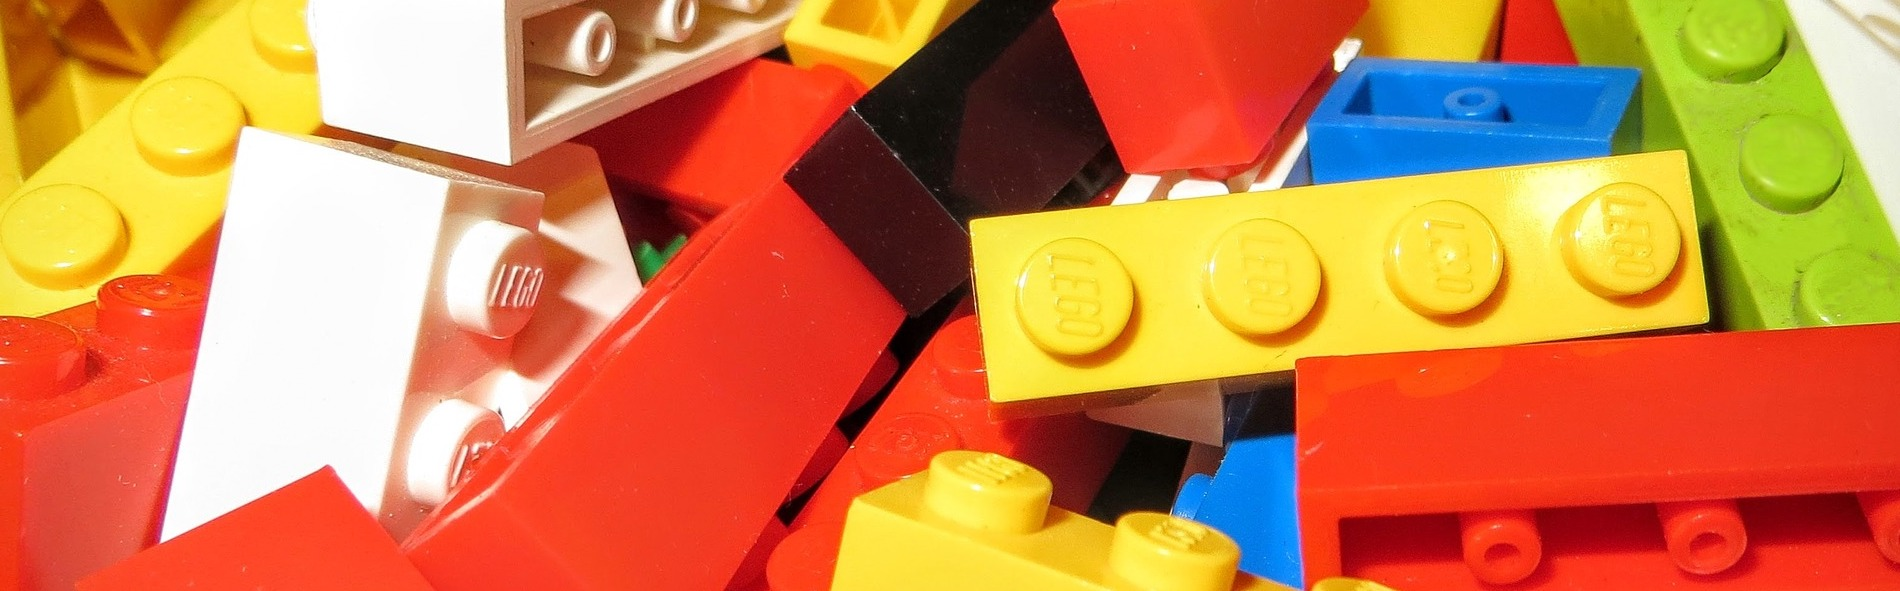

# Import Statements

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
colors_df = pd.read_csv('data/colors.csv')

In [5]:
colors_df.shape

(135, 4)

In [91]:
colors_df['name'].nunique()

135

In [6]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [44]:
print (f"Total number is {colors_df.count()}")

print (f"Number of transparent colors: {colors_df[colors_df['is_trans'].isin(['t'])].count()}")

print (f"Number of opaque colors: {colors_df[colors_df['is_trans'].isin(['f'])].count()}")

Total number is id          135
name        135
rgb         135
is_trans    135
dtype: int64
Number of transparent colors: id          28
name        28
rgb         28
is_trans    28
dtype: int64
Number of opaque colors: id          107
name        107
rgb         107
is_trans    107
dtype: int64


In [45]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [46]:
# print the shape to know the number of rows

(135, 4)

In [53]:
print (f"Number of transparents: {colors_df['is_trans'].value_counts()['t']}")
print (f"Number of opaques: {colors_df['is_trans'].value_counts()['f']}")


Number of transparents: 28
Number of opaques: 107


In [92]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [94]:
colors_df.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.


![bricks.jpg](https://i.imgur.com/aKcwkSx.png)


A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

![box](https://i.imgur.com/whB1olq.png)

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [15]:
sets_df = pd.read_csv('data/sets.csv')
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [60]:
sort_sets_df = sets_df.sort_values(by=['year', 'num_parts'], ascending=True)
print (f'The most popular set in {sort_sets_df.head(1).iloc[0].year} is the {sort_sets_df.head(1).iloc[0]["name"]}')

The most popular set in 1949 is the Small Doors and Windows Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [62]:
first_year = sort_sets_df.head(1).iloc[0]['year']
print (f"The first year is <{first_year}>")
print (f"The number of sets sold in {first_year} is {sort_sets_df['year'].value_counts()[first_year]}")


The first year is <1949>
The number of sets sold in 1949 is 5


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [67]:
size_sets = sets_df.sort_values(by=['num_parts'], ascending=False)
size_sets.head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [77]:
group_df = sets_df.groupby('year')

In [84]:
group_df.count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [97]:
sets_df.groupby('year').value_counts()


year  set_num       name                               theme_id  num_parts
1949  700.1-1       Extra-Large Gift Set (ABB)         365       142          1
      700.2-1       Large Gift Set (ABB)               365       178          1
      700.3-1       Medium Gift Set (ABB)              365       142          1
      700.A-1       Small Brick Set (ABB)              371       24           1
      700.B-1       Small Doors and Windows Set (ABB)  371       12           1
                                                                             ..
2020  TEDDYBEAR-1   Teddy Bear                         232       67           1
      TOUCAN2020-1  Toucan                             621       22           1
2021  75546-1       Minions in Gru’s Lab               689       0            1
      75547-1       Minion Pilot in Training           689       0            1
      75550-1       Minions Kung Fu Battle             689       0            1
Name: count, Length: 15710, dtype: int64

In [115]:
grouped = sets_df.groupby('year').count()
grouped


,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [156]:
grouped = sets_df.groupby('year')
print (grouped.get_group(1955).sum(numeric_only=True).year)
print (grouped.get_group(2019).sum(numeric_only=True).year)

print (f'{grouped.get_group(2019).sum(numeric_only=True).year-grouped.get_group(1955).sum(numeric_only=True).year}')



54740
1695960
1641220


In [180]:
# Also:
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num'].head()


year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

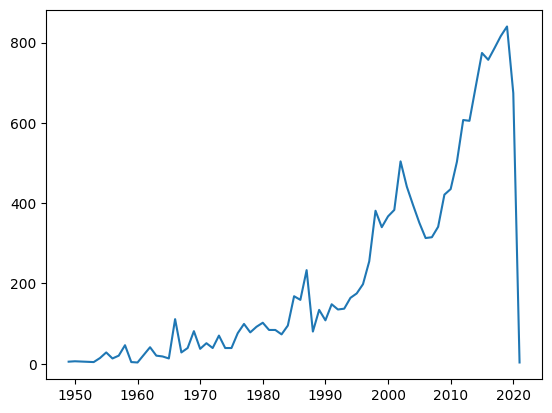

In [164]:
plt.plot(sets_by_year.index, sets_by_year['set_num'])

In [185]:
# Find the part where the date is 2020. I expect this to be around row 70.
losers = sets_by_year['set_num'].isin(['2021'])
#sets_by_year.head()
#sets_by_year.columns
keepers = sets_by_year[losers]
keepers


,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key
